# Data Preparation Techniques for Data Science

## Why Should You Care?

* Automated data preparation might not make the best choices
* Interesting opportunities to drive insights and business value


<BR><BR><BR>
<BR><BR><BR>
    <BR><BR><BR>

# Topics:

* ## Categorical Variables
* ## Imputation of Missing Data
* ## Cyclical Variables as Predictors

<BR><BR>
*Opportunities* for us to improve analytics.
<BR><BR><BR><BR><BR><BR>
<BR><BR><BR>
<hr>
<hr>

# Topic 1: Categorical Independent Variables


  ### *Interval* Variable - Intervals between values correspond to real world differences
  ### *Ordinal* Variable - Ordered, but distance not evenly spaced
  ### *Categorical* Variable (aka Nominal) - Not ordered
  ### *Dichotomous* Variable - Two Valued 

<BR><BR>

<img src="img/categorical_division.png" width="800" height="500">
                    from https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

<BR><BR><BR>

* Automatic detection by learning systems:
    * **Alphabetic** - system may guess these are categorical variables
    * **Numeric** - system may guess these are interval variables.

<BR><BR><BR>

**Categorical** variables can be easily encoded in numbers:

| Color | Encoding |
| --- | :---: |
| Red | 1 |
| Green | 2 |
| Blue | 3 |

### If your data system treats these encodings as continuous variables:
  * Problem 1: Implication that data is **ordered**
  * Problem 2: Implication that data is **evenly spaced**
  
<BR><BR><BR><BR>

## Classic Solutions: Encode values as separate variables (*one-hot encoding*)
* N dummy variables. *N-1 dummy variables used for classic statistics.*
* For large N: K dummy variables ( K << N ).  
  * Kuhn & Johnson, *Applied Predictive Modeling*.

<BR>   

In [14]:
import pandas as pd
from IPython.display import display, HTML
# Calls get_dummies and concatenates this to the data set
train_df = pd.read_csv('data/titanic/train.csv')
display(HTML(train_df[['Embarked']].head(10).to_html()))  # fancy syntax for pretty printing tables in jupyter
train_df = pd.concat([train_df, pd.get_dummies(train_df.Embarked, prefix='Embarked')], axis=1)
# note how new columns relate to the Embarked column
sample_table = train_df[train_df.Embarked.isnull()==False].head(10)
display(HTML(sample_table[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].to_html()))  # fancy syntax for pretty printing tables in jupyter

,Embarked
0,S
1,C
2,S
3,S
4,S
5,Q
6,S
7,S
8,S
9,C


,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,0,0,1
1,C,1,0,0
2,S,0,0,1
3,S,0,0,1
4,S,0,0,1
5,Q,0,1,0
6,S,0,0,1
7,S,0,0,1
8,S,0,0,1
9,C,1,0,0


## High cardinality (large N) example

### Four digit SIC codes -- most frequent is "business services -- not elsewhere classified"
* 751 different labels in sample:
* Half of the observations have one label (7389)
* Many 20 labels have a single observation
* Categorical dummies prone to *overfitting*
<BR><BR>
<img src="img/sic_4.png" width="200" height="500">
<BR><BR><BR><BR>
    



Take advantage of hierarchy in SIC codes known to us:
    
### Two digit SIC codes -- most frequent is business services
* 84 different labels
* More than half of the observations have one label (73)

<BR>
<img src="img/sic_2.png" width="200" height="500">

<BR><BR><BR>
<BR><BR><BR>
<BR><BR><BR>

High cardinality categoricals present their own challenge.

### Emerging Solution: **CatBoost** (Yandex 2017) -- https://tech.yandex.com/catboost/
  * https://towardsdatascience.com/deep-dive-into-catboost-functionalities-for-model-interpretation-7cdef669aeed
  * https://medium.com/whats-your-data/working-with-categorical-data-catboost-8b5e11267a37
  * https://arxiv.org/pdf/1706.09516.pdf
  * http://helios.mm.di.uoa.gr/~rouvas/ssi/sigkdd/sigkdd.vol3.1/barreca.pdf
  * https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb
  * https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db

* Categorical variable analysis is intrinsic to the analysis
  * CatBoost can create new features which are aggregates of multiple categorical variables
  * CatBoost handles **high-cardinality** variables (many valued)
* Note: **Do not one-hot encode** prior to processing
* '*Categorical features are used to build new numeric features based on categorical features and their combinations.*'

CatBoost has demonstrated ability to outperform other boosting algorithms (XGBoost) and is making inroads.

<img src="img/CatBoostPipelineContrast.png" width="800" height="500">
<BR><BR><BR><BR>

### Show CatBoost results

<img src="img/catboost-learn.png" width="1000" height="600">

CatBoost is available in python, r, and from command line.


<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
    

<HR>


<hr>
<hr>

## Topic 2: Missing Data 

### Scenario 1: Average Order Value

You decide a good predictive variable is **Average Order Value for Prior Orders**.

You believe that customers who spend have a history of higher order values will also have higher order values in the future.

<img src="img/TimeToPurchase-AmountToSpend.png" width="1000" height="600">

Consider example Data:


| Customer | Average Order Value ($) |
| :-- | :--: |
| Jones | 25 |
| Smith | 32 |
| Andersen | 54 |
| Zelnick | 17 |
| Henderson | 61 |
| Lexie | 101 |
| Alexander | 57 |
| Burdman | 22 |
| Blake | 18 |
| Ma | 23 |
| Thomas | . |

### What do you do for Thomas since he has not placed an order?

<BR><BR><BR><BR>

### Scenario 2: Time since Event

You decide a good predictive variable is **Time Since Event X**.

Maybe event X is the last time product Y was purchased, and you have the following hypotheses:
* Customers who just purchased Y will not need to purchase a Y for awhile.
* Customers who have not purchased Y for a long period may be ready to purchase Y again soon.

<BR>
<BR>
<img src="img/TimeToPurchase.png" width="1200" height="800">
<BR>
<BR>
    
Consider example Data:


| Customer | Time Since Last Purchase (Days) |
| :-- | :--: |
| Jones | 30 |
| Smith | 90 |
| Andersen | 360 |
| Zelnick | 1254 |
| Henderson | 2547 |
| Lexie | 272 |
| Alexander | 245 |
| Burdman | 263 |
| Blake | 281 |
| Ma | 4124 |
| Thomas | . |
    

    
### What do you do for Thomas's Time Since Last Purchase?
    
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

## Solutions
* Easy solutions:
  * *Drop variables* which have missing observations
  * *Drop observations* which have missing variables

These only work when very few omissions occur in the matrix of observations and variables.

### Dropping variables or observations reduces the quantity of data available for inferences.

<BR>
    <BR>
Consider example data with a single missing value:


| Var1 | Var2 | Var3 | Var4 | Var5 | Var6| Var7| Var8| Var9 |
| :--: | :--:| :--:| :--:| :--:| :--:| :--:| :--:| :--: |
| 25 | 3 | 15 | 4 | 17 | 6 | 8 | 3 |. |
| 2 | 4 | 15 | 7 | 19 | 4 | 6 | 3 | 234 |
| 25 | 3 | 2 | 4 | 17 | 2 | 6 | 3 | 23|
| 24 | 4 | 3 | 3 | 25 | 1 | 6 | 3 |2 |
| 3 | 4 | 1 | 5 | 25 | 6 | 8 | 3 |1 |
| 23 | 3 | 15 | 45 | 23 | 5 | 6 | 3 |3 |
| 2 | 4 | 15 | 7 | 19 | 2 | 55 | 3 | 234 |
| 25 | 3 |5| 3 | 17 | 2 | 3 | 3 | 23|
| 24 | 1 | 3 | 4 | 25 | 5 | 6 | 6 |2 |

In this case, we could drop one observation to analyze data.


<BR><BR><BR><BR><BR><BR><BR>
But consider this example with missing variable scattered:



| Var1 | Var2 | Var3 | Var4 | Var5 | Var6| Var7| Var8| Var9 |
| :--: | :--:| :--:| :--:| :--:| :--:| :--:| :--:| :--: |
| 25 | 3 | 15 | 4 | 17 | 6 | 8 | 3 |. |
| 2 | 4 | 15 | 7 | 19 | 4 | 6 | 3 | 234 |
| 25 | 3 | 2 | 4 | 17 | 2 | . | 3 | 23 |
| 24 | 4 | 3 | 3 | . | 1 | 6 | 3 | 2 |
| 3 | 4 | 1 | 5 | 25 | 6 | 8 | 3 | 1 |
| 23 | 3 | 15 | .  | 23 | 5 | 6 | 3 |3 |
| 2 | 4 | 15 | . | 19 | 2 | 55 | 3 | 234 |
| 25 | 3 |5| 3 | 17 | 2 | 3 | 3 | 23|
| 24 | 1 | 23 | 4 | 25 | 5 | 6 | 6 |2 |

Cannot drop *observations* or *variables* in above example: ***We would lose half the observations or half the variables!***

<BR>
<BR>
<BR>
<BR>
    


### **Imputation**: replacing missing data with substituted values

Weak techniques for substituting missing values:
* Substitute **static** value for missing values

Good techniques to substitute missing values:
* Mean, median, mode (most frequent)
* Other statistical calculation
* Predict missing value from other data

Techniques not discussed here:
* Partition data set and create separate models for segments of data set

<BR><BR>

### Simple illustrations

In [1]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
import numpy as np
actual_data = np.array([[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9], [4, 3, 6]])
actual_data

array([[nan,  2.,  3.],
       [ 4., nan,  6.],
       [10., nan,  9.],
       [ 4.,  3.,  6.]])

### mean value -- the missing value in the upper left cell becomes a 6 
* mean of 4, 4, 10 
* (4+4+10)/3= 6.

In [3]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(actual_data)
print(imp_mean.transform(actual_data))
type(imp_mean.transform(actual_data))

[[ 6.   2.   3. ]
 [ 4.   2.5  6. ]
 [10.   2.5  9. ]
 [ 4.   3.   6. ]]


numpy.ndarray

### median value -- the missing value in the upper left cell becomes a 4
* median of 4, 4, 10

In [4]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(actual_data)
print(imp_mean.transform(actual_data))

[[ 4.   2.   3. ]
 [ 4.   2.5  6. ]
 [10.   2.5  9. ]
 [ 4.   3.   6. ]]


### (Experimental) sklearn IterativeImputer: simplifies imputation


In [5]:
from sklearn.linear_model import BayesianRidge
print('Original:')
print(actual_data)
print('=========================')
print('BayesianRidge')
iterative_imp = IterativeImputer(random_state=0, estimator=BayesianRidge())
iterative_imp.fit(actual_data)
print(iterative_imp.transform(actual_data))
print('-------------------------')                              
print('DecisionTree')
from sklearn.tree import DecisionTreeRegressor
iterative_imp = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0))
iterative_imp.fit(actual_data)
print(iterative_imp.transform(actual_data))
print('-------------------------')                              
print('ExtraTrees')
from sklearn.ensemble import ExtraTreesRegressor
iterative_imp = IterativeImputer(random_state=0, estimator=ExtraTreesRegressor(n_estimators=10, random_state=0))
iterative_imp.fit(actual_data)
print(iterative_imp.transform(actual_data))
print('-------------------------')   
print('KNearestNeighbors')
from sklearn.neighbors import KNeighborsRegressor
iterative_imp = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(n_neighbors=2))
iterative_imp.fit(actual_data)
print(iterative_imp.transform(actual_data))


Original:
[[nan  2.  3.]
 [ 4. nan  6.]
 [10. nan  9.]
 [ 4.  3.  6.]]
BayesianRidge
[[-1.9999017   2.          3.        ]
 [ 4.          2.999998    6.        ]
 [10.          4.00016125  9.        ]
 [ 4.          3.          6.        ]]
-------------------------
DecisionTree
[[ 4.  2.  3.]
 [ 4.  3.  6.]
 [10.  3.  9.]
 [ 4.  3.  6.]]
-------------------------
ExtraTrees
[[ 6.4  2.   3. ]
 [ 4.   3.   6. ]
 [10.   2.6  9. ]
 [ 4.   3.   6. ]]
-------------------------
KNearestNeighbors
[[ 4.   2.   3. ]
 [ 4.   2.5  6. ]
 [10.   2.5  9. ]
 [ 4.   3.   6. ]]


### Imputed values ranged from -2 to +6.4

<BR><BR><BR><BR>
<HR>

## Missing Data in Summary Statistics: Not Just Missing Cells


### Scenario 1: Average Order Value

<img src="img/SummaryStatisticBias.png" width="600" height="700">


<BR><BR><BR><BR><BR><BR>

### Consider: Customer C has never purchased.  How do you compare customer C's AOV to customers A and B?
    
    
    
<BR><BR><BR><BR>
<BR><BR><BR><BR>
<BR><BR><BR><BR>
<BR><BR><BR><BR>
    
    
    
<BR>
<BR>
<BR>
<BR>
<BR>

    

### Average is a Statistic -- the Statistic is an **Estimator** for a Population


Customer C: For an unknown customer, you could use the Average Order Value for all Customers (\$40)

Customer A: We confidently place population AOV at \$50

Customer B: We should combine our **prior** estimate of \$40 USD with **new information** (sample of \$60)



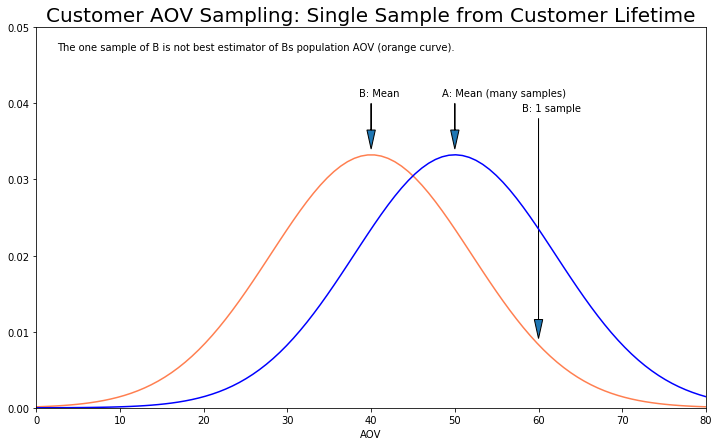

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

def draw_norm_plot():
    x_min = 0.0
    x_max = 80.0
    mean = 40.0 
    std = 12.0
    x = np.linspace(x_min, x_max, 100)
    y = scipy.stats.norm.pdf(x,mean,std)
    plt.plot(x,y, color='coral')
    plt.arrow(60, 0.038, 0, -.0264, head_width=1, head_length=.0025)
    plt.text(58, 0.039, 'B: 1 sample')
    plt.arrow(40, 0.04, 0, -.0035, head_width=1, head_length=.0025)
    plt.text(38.5, 0.041, 'B: Mean')

    mean = 50.0 
    std = 12.0
    x = np.linspace(x_min, x_max, 100)
    y = scipy.stats.norm.pdf(x,mean,std)
    plt.plot(x,y, color='blue')
    plt.arrow(50, 0.040, 0, -.0035, head_width=1, head_length=.0025)
    plt.text(48.5, 0.041, 'A: Mean (many samples)')
    
    plt.text(2.5, 0.047, 'The one sample of B is not best estimator of Bs population AOV (orange curve).')
    plt.xlim(x_min,x_max)
    plt.ylim(0,0.05)
    plt.title('Customer AOV Sampling: Single Sample from Customer Lifetime',fontsize=20)
    plt.xlabel('AOV')
    fig = plt.gcf()
    fig.set_size_inches(12, 7)

draw_norm_plot()
plt.show()

<BR><BR><BR>

### Shrinkage

You can use a statistical model to create a new variable, the customers EAOV (Estimated Average Order Value).

$AOV_{i} = \lambda_{i} * AOVSample_{i} + 1 - \lambda_{i} * AOVMean$

* For customer *A* the EAOV would be \$50.
* For customer *B* would be a weighted average of 60 and 40 dollars.  
* For customer *C* the EAOV would be \$40.

The estimator for B's AOV is closer to the overall mean than the sample, an application of *shrinkage*.
    




Estimated AOV is $ 43.0


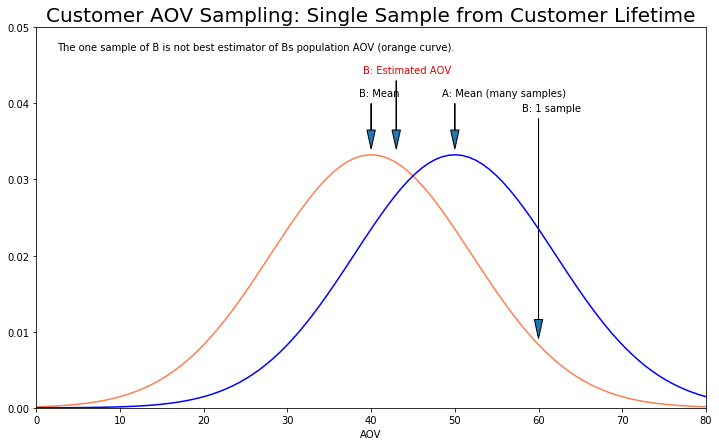

In [7]:
alambda = 0.3
aov_b = alambda * 50 + (1-alambda) * 40
print(f'Estimated AOV is $ {aov_b}')

plt.arrow(aov_b, 0.043, 0, -.0065, head_width=1, head_length=.0025)
plt.text(aov_b-4, 0.044, 'B: Estimated AOV', color='xkcd:red')

draw_norm_plot()
plt.show()

Warning: **A business which chases small samples will follow *outliers* (and then be disappointed).**


<BR><BR>
<BR><BR>
<BR><BR>
<BR><BR>
<HR>

### Scenario 2: Time Since Last Purchase

<img src="img/DurationSinceLastPurchase.png" width="600" height="700">

* **Mean** time since last purchase is 28 months.
* **Modal** (most frequent) time since last purchase is 0 months

What options would make sense for the customer with no purchase history?

<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR> 
Take-away: One needs to think about this issue before automated imputation.
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>



<BR>
<HR>

# Topic 3: How to Use Cyclical Variables as Predictors

Scenario 1: **Time of Year** is a Predictive Variable for Likelihood of Ordering


<img src="img/TimeToPurchase-Month Relationships.png" width="1200" height="800">


Scenario 2: **Time of day** is also an example of a cyclical variable

<BR><BR><BR><BR>

    

## Problematic: Encode month of year as an integer variable

* Treating months as ordinal does not recognize cycle: smallest and largest values are adjacent
* Certain models (such as OLS) will not capture this non-linear relationship
    
<BR><BR>

    
    
    
    
## Typical Next Answer: Encode months categorically
* **Loses adjacency** between months
* Risks overfitting and requires more data to derive relationships. 
* Months (or quarters) themselves are buckets with arbitrary values
<BR><BR><BR><BR><BR><BR>

# Suggested Technique: Take cos/sin of portion of % of year

* Example: divide year into units (could be months, weeks, or days)

<img src="img/unit_circle.png" width="500" height="500">


In [7]:
import numpy as np
for dname, dnum in (['Jan 11', 11], ['Sep 11', 254], ['Oct 11', 284]):
    temp = 2 * np.pi * dnum / 365.0
    print(f'{dname}: sin {np.round(np.sin(temp), 2)}, cos {np.round(np.cos(temp), 2)}')

Jan 11: sin 0.19, cos 0.98
Sep 11: sin -0.94, cos -0.33
Oct 11: sin -0.98, cos 0.18


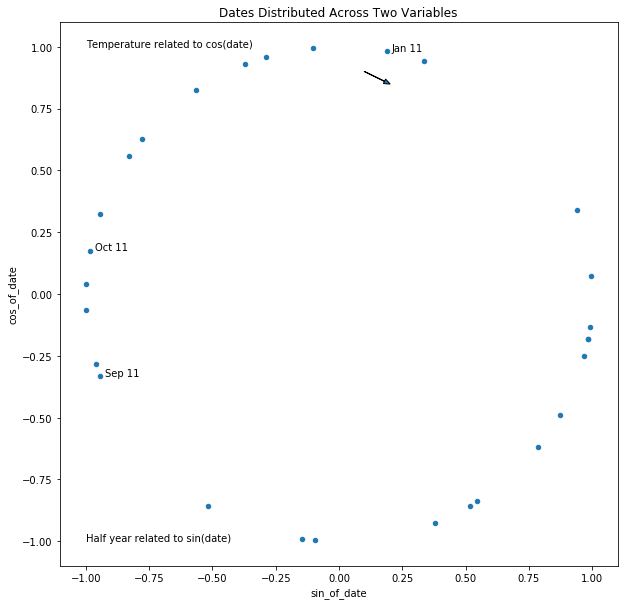

In [27]:
%matplotlib inline
import pandas as pd
np.random.seed(42)
rand_days = np.append(np.random.randint(0, 365, 25), [11, 254, 284])
# print(rand_days)
df=pd.DataFrame(rand_days, columns=['day_num'])
df['sin_of_date'] = np.sin(2*np.pi*df.day_num/365)
df['cos_of_date'] = np.cos(2*np.pi*df.day_num/365)
plt = df.plot.scatter('sin_of_date','cos_of_date', figsize=(10, 10))
plt.set_title('Dates Distributed Across Two Variables')
for dname, dnum in (['Jan 11', 11], ['Sep 11', 254], ['Oct 11', 284]):
    _ = plt.text(df[df.day_num==dnum].sin_of_date.values[0]+.02, df[df.day_num==dnum].cos_of_date.values[0], dname)
_ = plt.arrow(0.1, 0.9, 0.08, -.04, head_width=0.02, head_length=.025)
_ = plt.text (-1, 1, 'Temperature related to cos(date)')
_ = plt.text (-1, -1, 'Half year related to sin(date)')

# Wrap Up

<BR><BR>
<BR><BR>
<BR><BR>
    



    
## We looked at three aspects of data:
    
* ### Categorical Variables
* ### Imputation of Missing Data
* ### Cyclical Data as Predictive Variables

<BR><BR><BR>
    
## Each case has relevant techniques which can let you drive more mileage from your data.
<BR>
<BR><BR><BR>
<BR><BR><BR>
    


### The hands on python workshop will give provide an opportunity to work with modules which support these activities.